In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import datetime


In [1]:
# !gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: e:\OneDrive\OneDrive - nika04\AIO-2024\EXERCISE\Module_4\M4W2_05-10\BTC-Daily.csv

  0%|          | 0.00/257k [00:00<?, ?B/s]
100%|██████████| 257k/257k [00:00<00:00, 1.26MB/s]
100%|██████████| 257k/257k [00:00<00:00, 1.25MB/s]


In [28]:
df = pd.read_csv('./data/BTC-Daily.csv')
df = df.drop_duplicates()
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [29]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


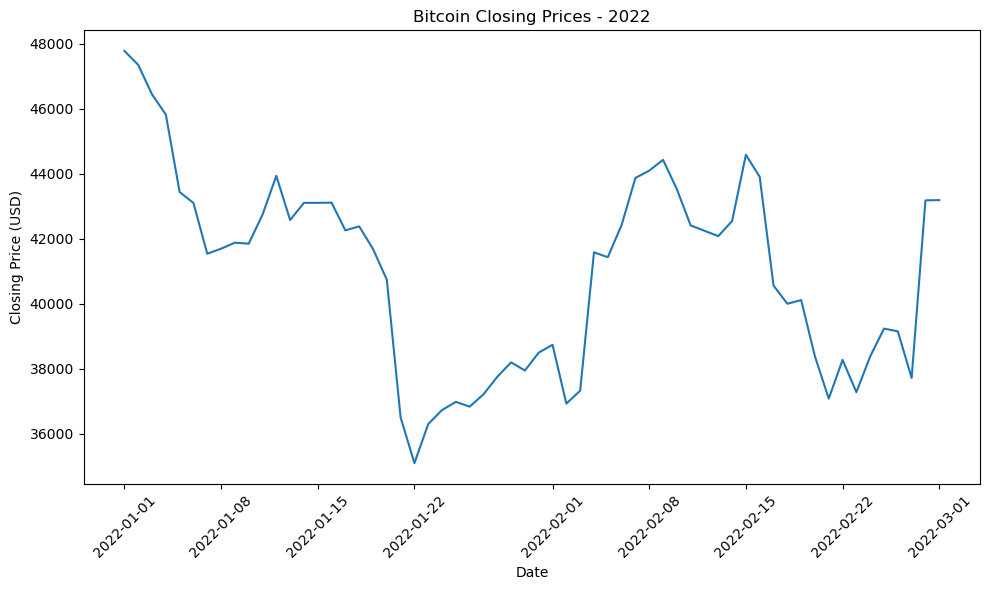

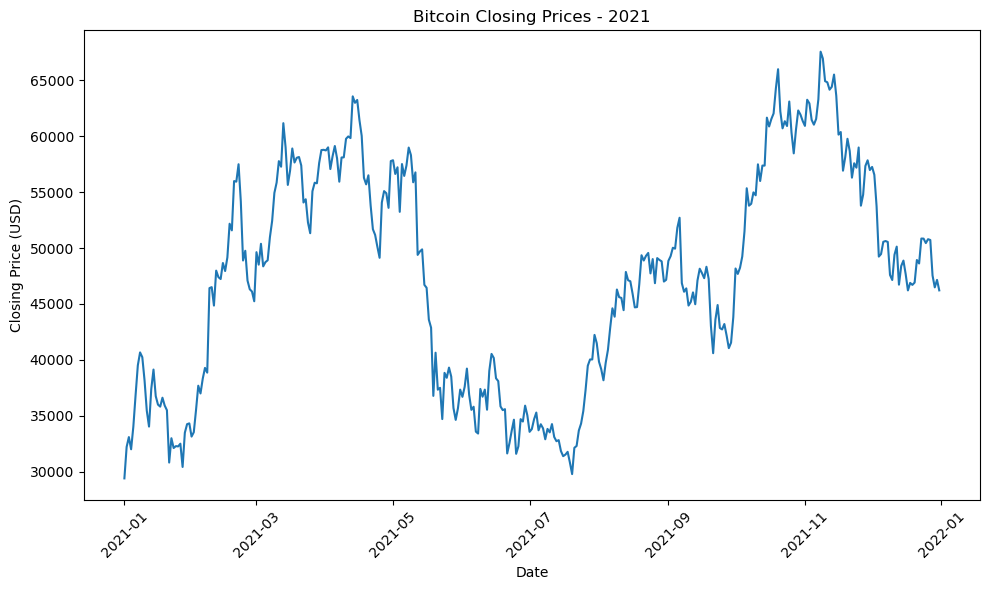

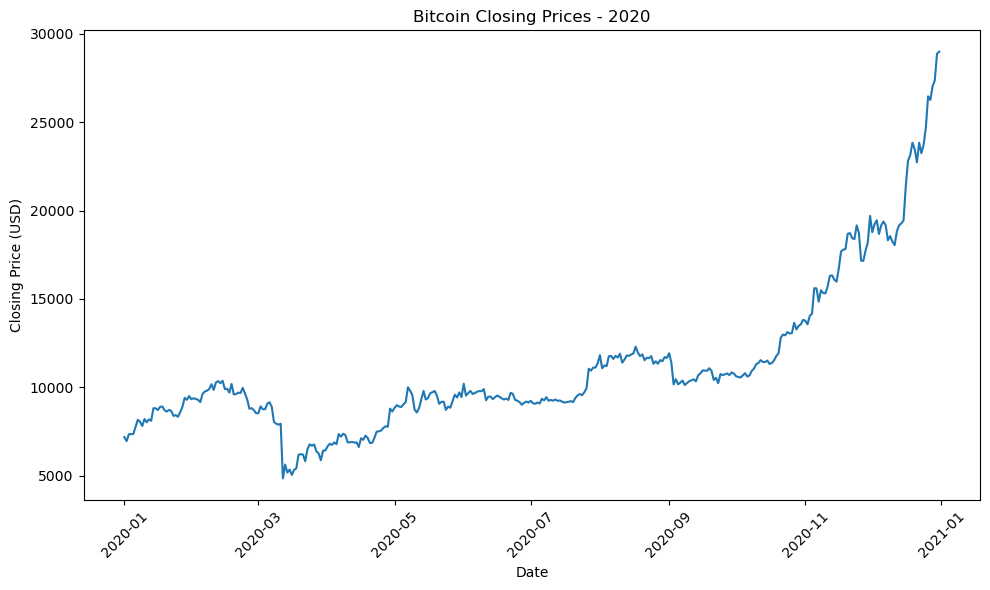

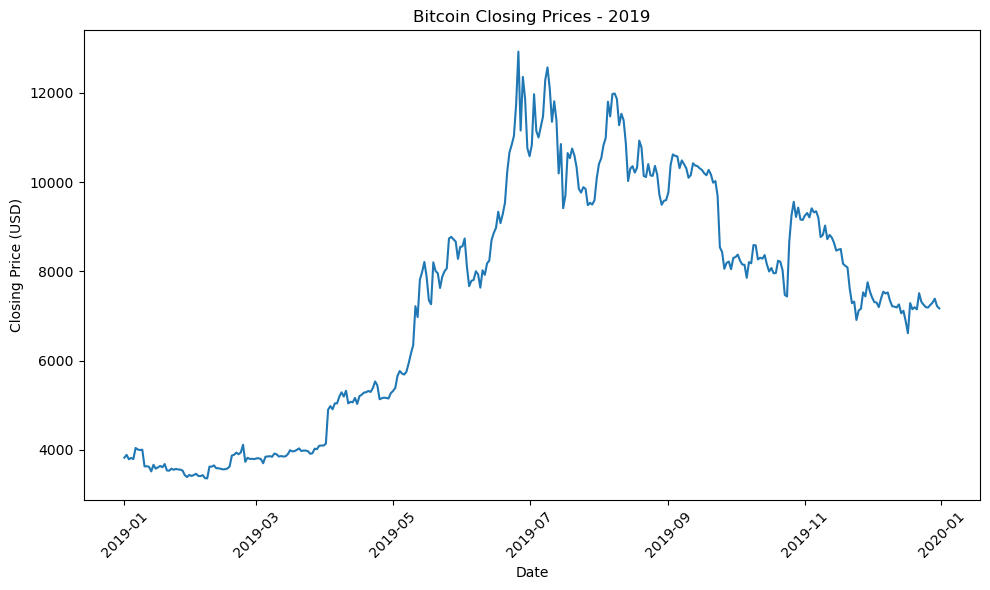

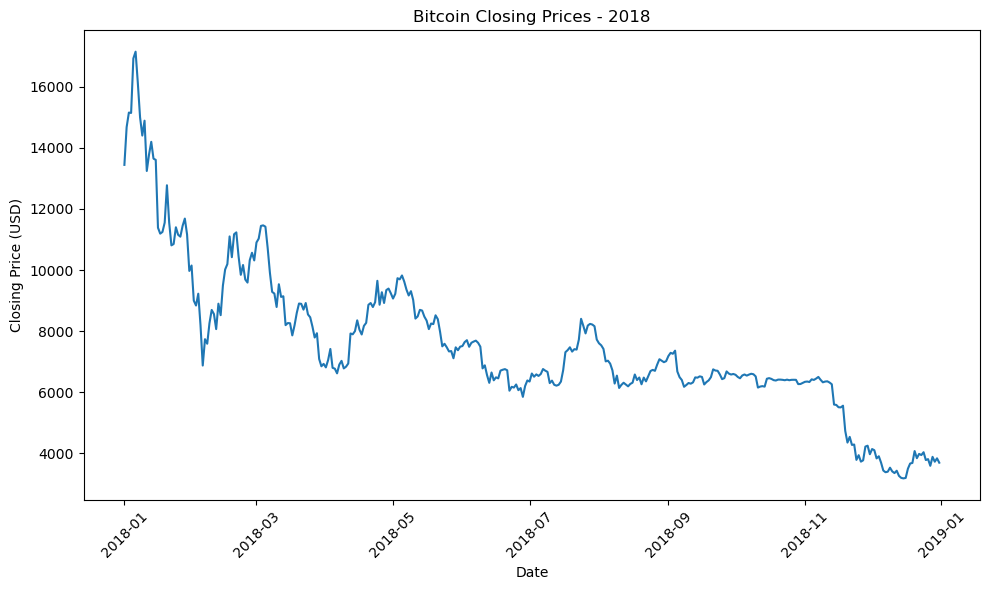

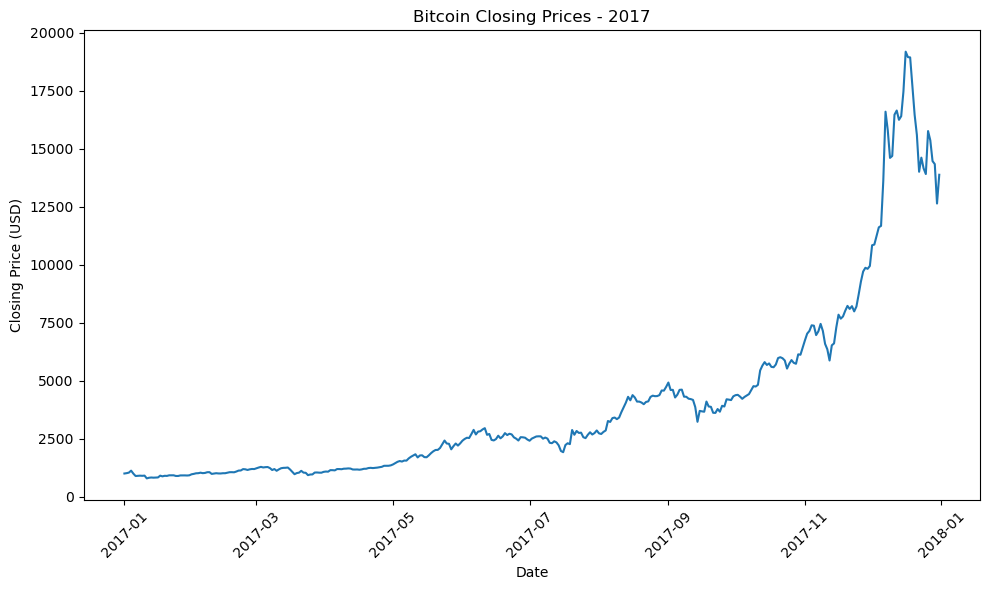

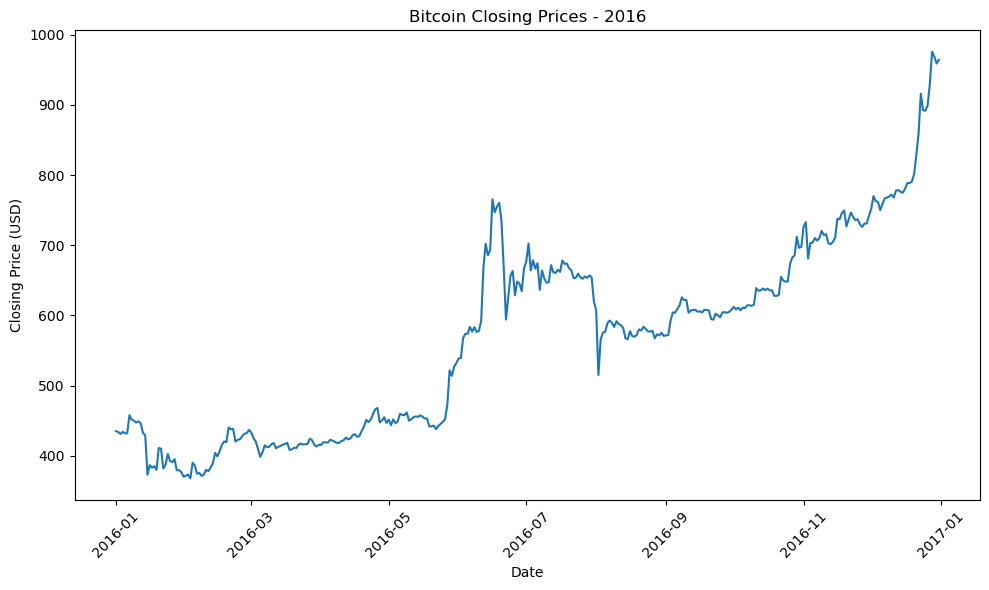

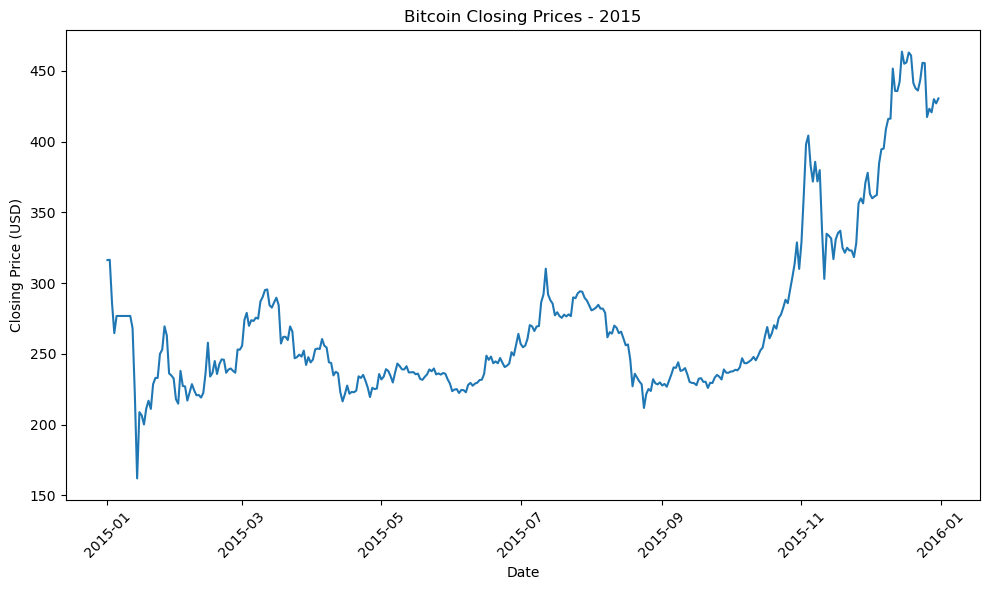

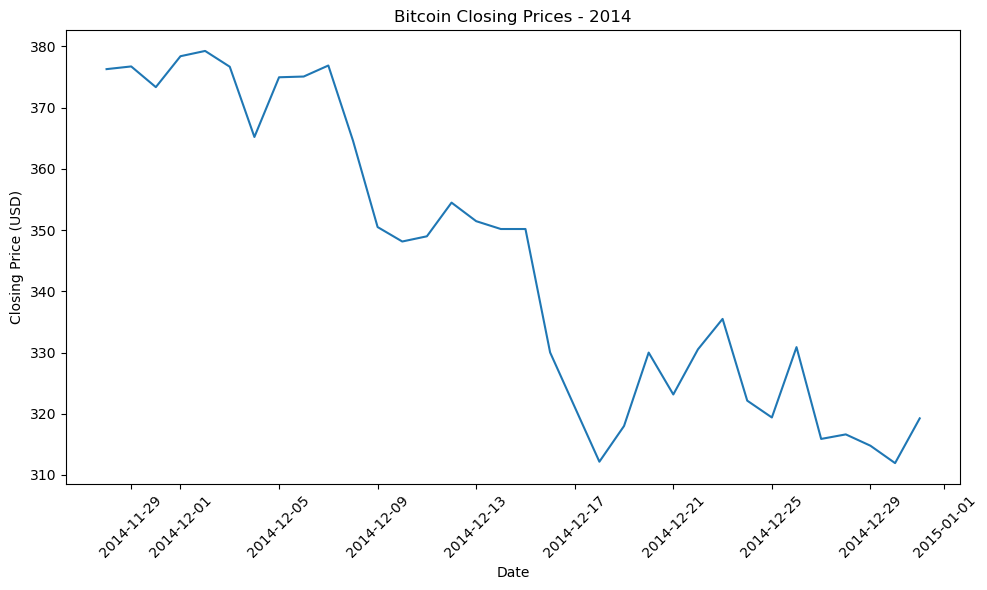

In [10]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' +str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
for year in unique_years:

    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day


    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
# !pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00


C:\Users\duchu\AppData\Local\Temp\ipykernel_17896\2006452442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


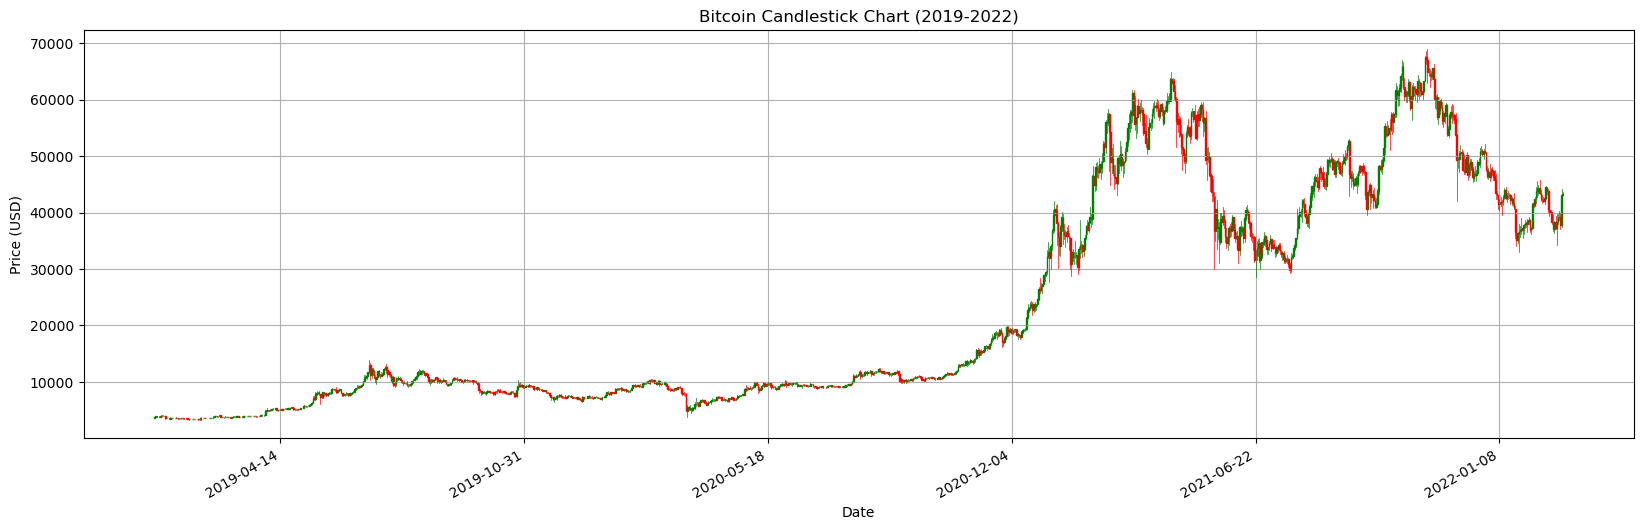

In [14]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


In [32]:
def predict(X, w, b):
    y_hat =  X.dot(w) + b
    return y_hat

def gradient(y_hat , y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / len(y)
    return (dw , db , cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new , b_new)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [33]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)  # Initialize weights
  b = 0  # Initialize bias
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(X, w, b)
    dw, db , cost = gradient(y_hat , y, X)
    w, b = update_weight(w, b, learning_rate , dw , db)
    losses.append(cost)


  return w, b, losses

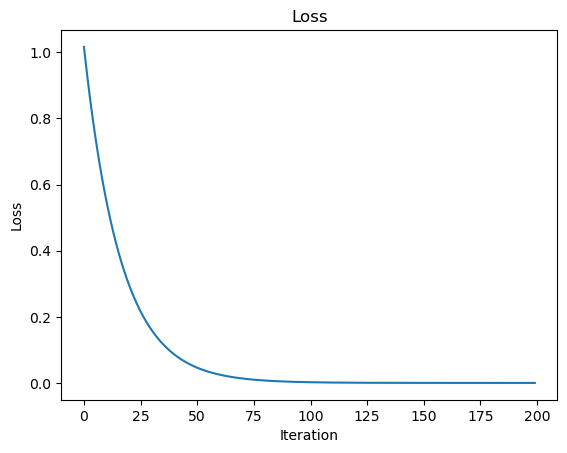

In [34]:
w, b, losses = linear_regression_vectorized(X_train.values , y_train.values , learning_rate =0.01 , num_iterations =200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [35]:
# Question 9
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


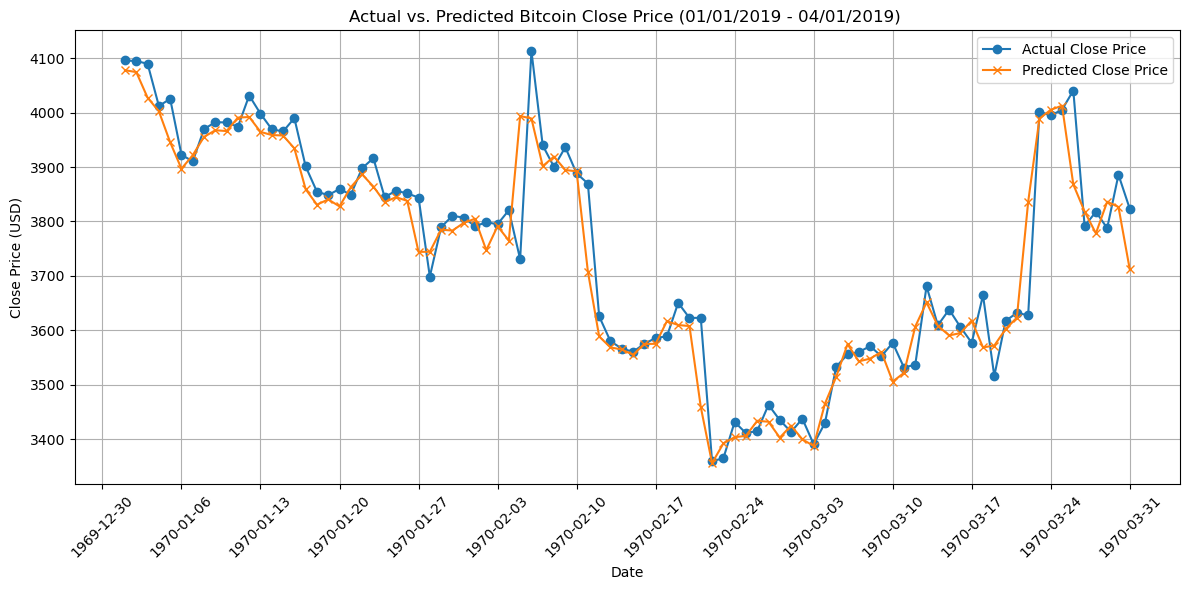

In [50]:
# Filter data for 2019 -01 -01 to 2019 -04 -01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1 [["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1 , w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual , label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred , label='Predicted Close Price',marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019) ')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend ()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set interval to show every week

plt.xticks(rotation =45)
plt.tight_layout ()
plt.show()